# Is is a bird ?
#### Modified by Marcos Valério de Carvalho Cardoso Júnior
##### A bird is too different from a forest, what if the difference between the comparation is hard to tell even to a human? Let's compare Bodybuilders and Calisthenics

In [31]:
!pip install -Uqq fastai
print("Tudo certo!")

Tudo certo!


In [32]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

print("Tudo certo!")


Tudo certo!


In [33]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

print("Tudo certo!")

Tudo certo!


In [34]:
from platform import python_version
print(f'A versão em uso é {python_version()}.')

A versão em uso é 3.11.5.


## Step 1: Download images of birds and non-birds

In [35]:
!pip install duckduckgo_search
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

print("Tudo certo!")

Tudo certo!


In [36]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('bodybuilders photos', max_images=1)
urls[0]

print("Tudo certo!")

Searching for 'bodybuilders photos'
Tudo certo!


In [37]:
from fastdownload import download_url
dest = 'bodybuilder.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

print("Tudo certo!")

Tudo certo!


In [38]:
download_url(search_images('calisthenics photos', max_images=1)[0], 'calisthenic.jpg', show_progress=False)
Image.open('calisthenic.jpg').to_thumb(256,256)

print("Tudo certo!")

Searching for 'calisthenics photos'
Tudo certo!


In [39]:
searches = 'calisthenic','bodybuilder'
path = Path('bodybuilder_or_calisthenic')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)
                  
print("Tudo certo!")
    

Searching for 'calisthenic photo'
Searching for 'calisthenic sun photo'
Searching for 'calisthenic shade photo'
Searching for 'bodybuilder photo'
Searching for 'bodybuilder sun photo'
Searching for 'bodybuilder shade photo'
Tudo certo!


## Step 2: Train our model

In [40]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

7

Tudo certo!


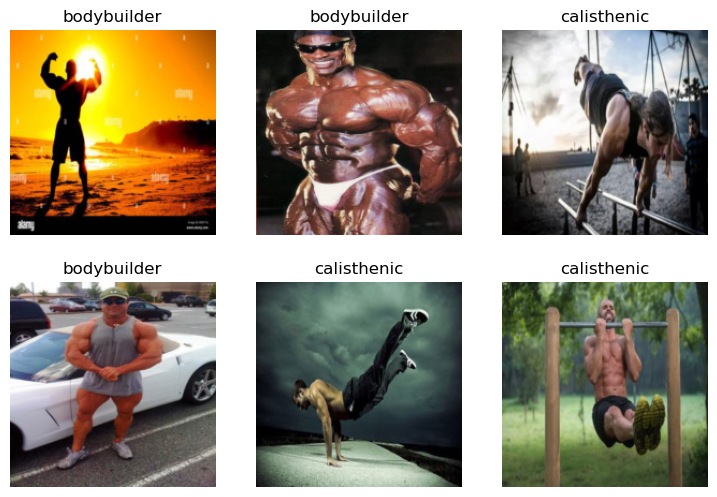

In [41]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)
print("Tudo certo!")

In [42]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

print("Tudo certo!")

epoch,train_loss,valid_loss,error_rate,time
0,1.211805,0.320766,0.151515,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.297836,0.115783,0.060606,00:03
1,0.196856,0.178782,0.060606,00:03
2,0.147759,0.147825,0.060606,00:03


Tudo certo!


## Step 3: Use our model (and build your own!)

In [44]:
is_bodybuilder,_,probs = learn.predict(PILImage.create('bodybuilder.jpg'))
print(f"This is a: {is_bodybuilder}.")
print(f"Probability it's a bodybuilder: {probs[0]:.4f}")

This is a: bodybuilder.
Probability it's a bodybuilder: 1.0000
